In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.externals import joblib


In [44]:
#loading data
train_df = pd.read_csv('C:/Users/Karthikeyan/Desktop/train.csv')
print("Train shape : ", train_df.shape)
test_df = pd.read_csv('C:/Users/Karthikeyan/Desktop/test.csv')
print("Train shape : ", test_df.shape)

Train shape :  (4209, 378)
Train shape :  (4209, 377)


In [45]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [47]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [48]:
def check_missing_values(df):
    
    if df.isnull().any().any():
        print("There are missing values in the data")  
    else: 
        print("There are no missing values in the data")

In [49]:
#calling functions to check missing values on training and test datasets
check_missing_values(train_df)
check_missing_values(test_df)

There are no missing values in the data
There are no missing values in the data


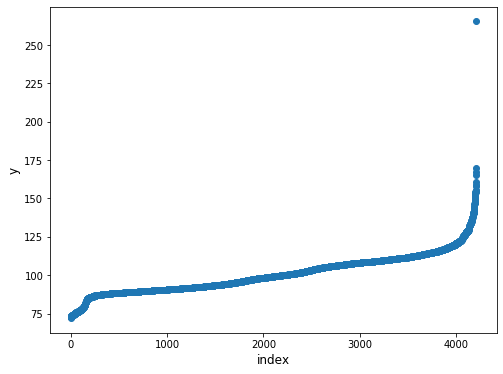

'here we have observed 1 outlier at apporx 260'

In [50]:
#we are checking 'y' column
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

"""here we have observed 1 outlier at apporx 260"""

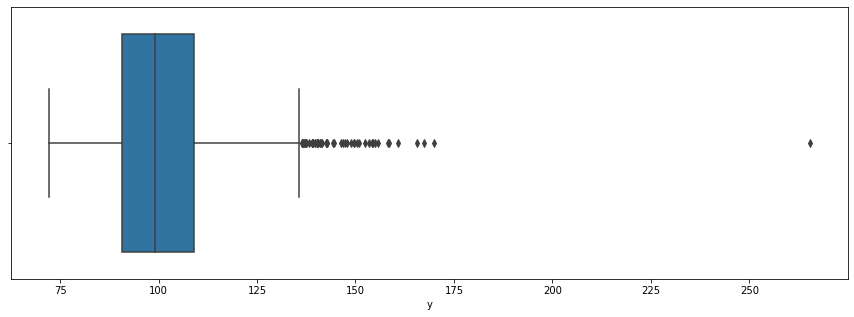

In [51]:
# we again check by visualising in BoxPlot

plt.figure(figsize=(15,5))
sns.boxplot(train_df.loc[:,'y'])
plt.show()

In [52]:
# we need to remove that outlier 

train_df['x'] = np.abs(stats.zscore(train_df.loc[:,'y']))

outlier_ids = train_df[train_df['x']>10].ID

train_df_final = train_df[~train_df['ID'].isin(list(outlier_ids))]

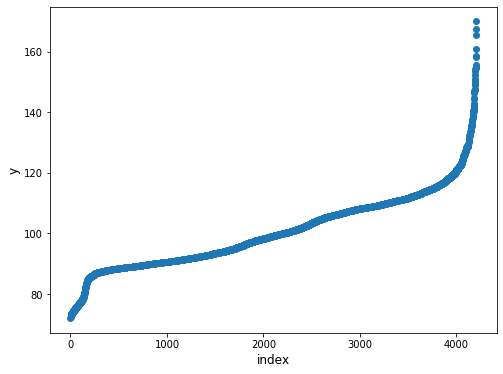

In [53]:
#now plotting again without outlier
#we are checking 'y' column
plt.figure(figsize=(8,6))
plt.scatter(range(train_df_final.shape[0]), np.sort(train_df_final.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

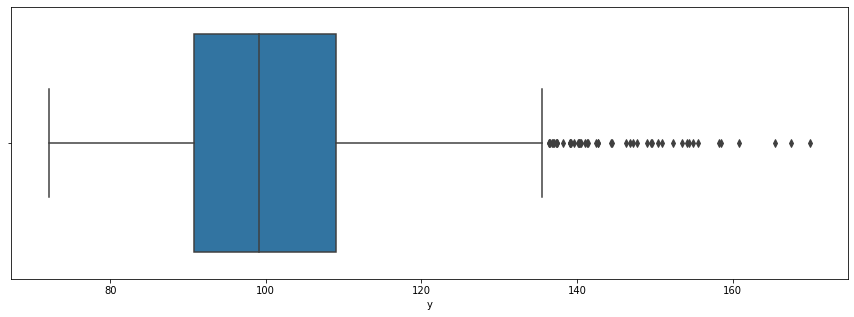

In [54]:
# we again check by visualising in BoxPlot

plt.figure(figsize=(15,5))
sns.boxplot(train_df_final.loc[:,'y'])
plt.show()

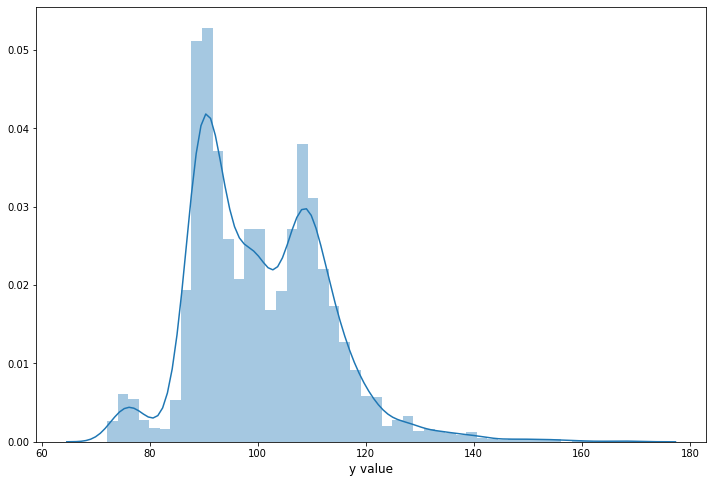

In [55]:
ulimit = 180# we have taken 180 data points
train_df_final['y'].ix[train_df_final['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))#plot size
sns.distplot(train_df_final.y.values, bins=50, kde=True)
plt.xlabel('y value', fontsize=12)
plt.show()

In [56]:
#removing that x helper row for outlier from main row

train_df_final = train_df_final.drop(["x"], axis=1)

In [57]:
dtype_df = train_df_final.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [58]:
#here we can see their types
dtype_df.ix[:15,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


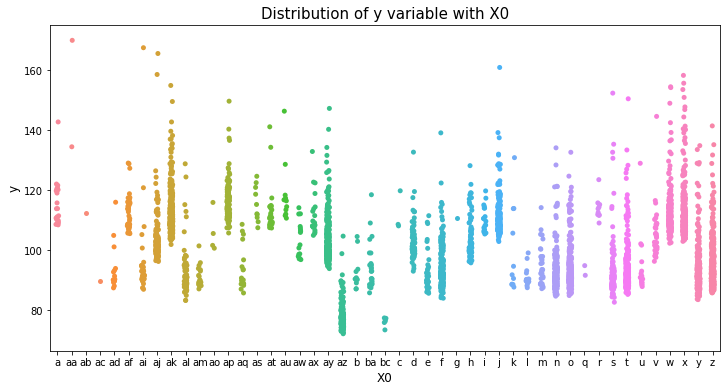

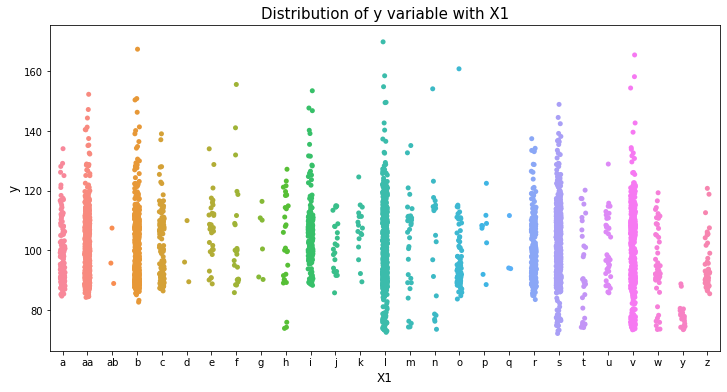

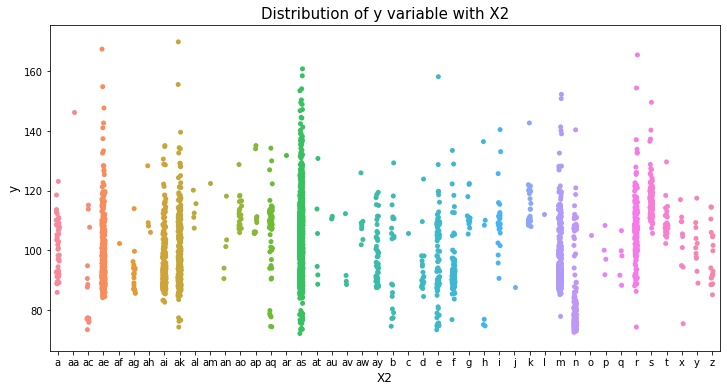

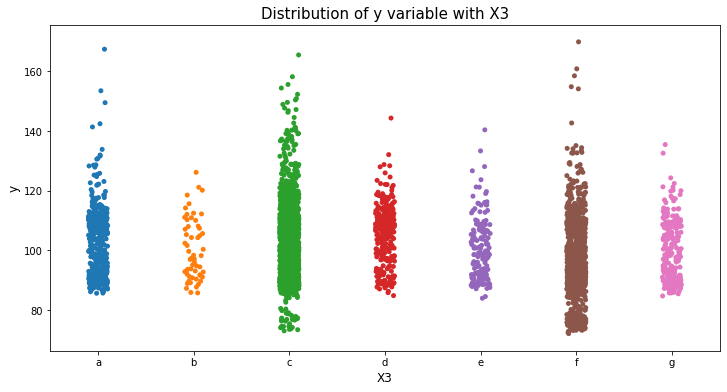

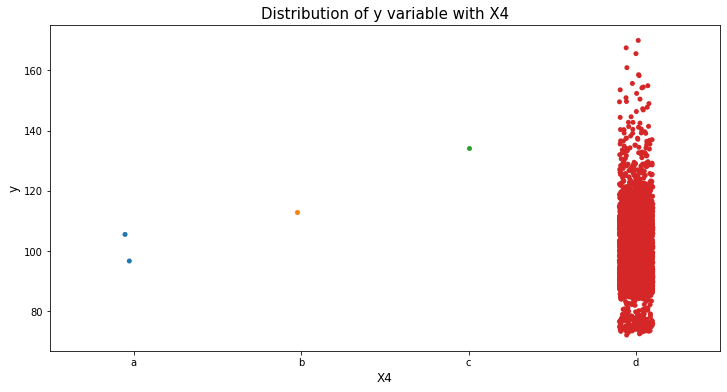

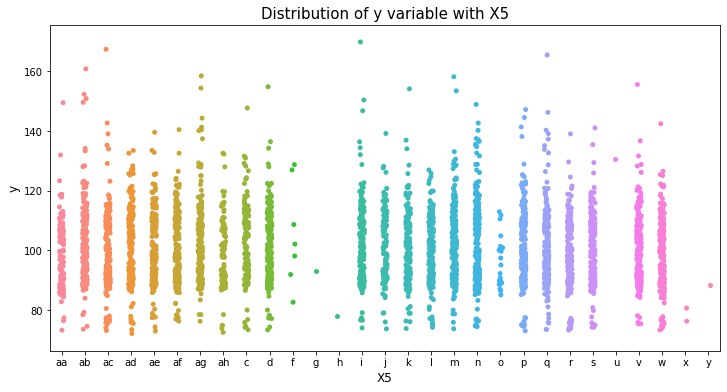

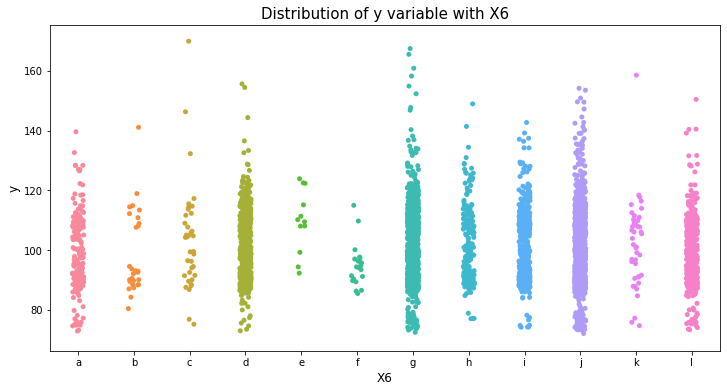

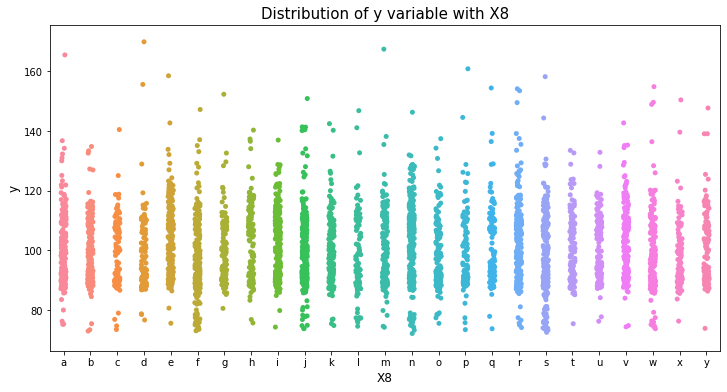

In [59]:
var_name = ['X0','X1','X2','X3','X4','X5','X6','X8']
for val in var_name:
    col_order = np.sort(train_df_final[val].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.stripplot(x=val, y='y', data=train_df_final, order=col_order)
    plt.xlabel(val, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title("Distribution of y variable with "+val, fontsize=15)
    plt.show()

In [60]:
train_df = pd.read_csv('C:/Users/Karthikeyan/Desktop/train.csv')
print("Train shape : ", train_df.shape)
test_df = pd.read_csv('C:/Users/Karthikeyan/Desktop/test.csv')
print("Train shape : ", test_df.shape)

y_train = train_df['y'].values
id_test = test_df['ID'].values

usable_columns = list(set(train_df.columns) - set(['ID', 'y']))#taking only important coloumns
print(len(usable_columns))

x_train_final = train_df[usable_columns]
x_test_final = test_df[usable_columns]

Train shape :  (4209, 378)
Train shape :  (4209, 377)
376


In [61]:
# Converting training dataset object categorical values to numerical categorical types

for column in usable_columns:
    cardinality = len(np.unique(x_train_final[column]))
    
    if cardinality == 1:
        x_train_final.drop(column, axis=1) # Column with only one value is useless so we drop it.
        x_test_final.drop(column, axis=1)
        
    if cardinality > 2: # Column is categorical.
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train_final[column] = x_train_final[column].apply(mapper)
        x_test_final[column] = x_test_final[column].apply(mapper)

In [62]:
# spiltting it into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x_train_final, y_train, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2946, 376)
(1263, 376)
(2946,)
(1263,)


In [63]:
#setting up xtrain and xtrain

y_mean = y_train.mean()

d_train = xgb.DMatrix(X_train, label=y_train)
d_cvalid  = xgb.DMatrix(X_test, label=y_test)
d_test = xgb.DMatrix(x_test_final)

In [64]:
# evaluation r2_score metric
def r2_score_metric(y_pred, y):
    y_true = y.get_label()
    return 'r2', r2_score(y_true, y_pred)

In [65]:
%%time
#xgb parameters
#just cross validation our model 

params = {
    
   'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

num_boost_round=2000

#Cross Validation of XGBoost 
cv_result = xgb.cv(params, 
                   d_train, 
                   num_boost_round, 
                   nfold = 3,
                   early_stopping_rounds=50,
                   feval=r2_score_metric,#here we have used our metric method
                   verbose_eval=100, 
                   show_stdv=False
                  )

[0]	train-rmse:12.32430	test-rmse:12.32246	train-r2:0.00592	test-r2:0.00495
Wall time: 3.75 s


In [66]:
params = {
    
   'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

In [67]:
num_boost_round=2000

In [68]:
cv_result = xgb.cv(params, 
                   d_train, 
                   num_boost_round, 
                   nfold = 3,
                   early_stopping_rounds=50,
                   feval=r2_score_metric,#here we have used our metric method
                   verbose_eval=100, 
                   show_stdv=False
                  )

[0]	train-rmse:12.32430	test-rmse:12.32246	train-r2:0.00592	test-r2:0.00495


In [69]:
#Training the model


#model = joblib.load('model_xgb.pkl')#from load

watchlist = [(d_train, 'train'), (d_cvalid, 'valid')]

model = xgb.train(params, d_train, num_boost_round, watchlist, early_stopping_rounds=50,
                  feval=r2_score_metric, maximize=True, verbose_eval=10)

#joblib.dump(model, 'model_xgb.pkl')#to load

[0]	train-rmse:12.32567	valid-rmse:13.35399	train-r2:0.00610	valid-r2:0.00251
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:11.96205	valid-rmse:13.03788	train-r2:0.06388	valid-r2:0.04917
[20]	train-rmse:11.62187	valid-rmse:12.74416	train-r2:0.11636	valid-r2:0.09153
[30]	train-rmse:11.30609	valid-rmse:12.47354	train-r2:0.16373	valid-r2:0.12970
[40]	train-rmse:11.01203	valid-rmse:12.22600	train-r2:0.20666	valid-r2:0.16390
[50]	train-rmse:10.73814	valid-rmse:11.99892	train-r2:0.24564	valid-r2:0.19467
[60]	train-rmse:10.48354	valid-rmse:11.78874	train-r2:0.28099	valid-r2:0.22264
[70]	train-rmse:10.24678	valid-rmse:11.59350	train-r2:0.31310	valid-r2:0.24818
[80]	train-rmse:10.02765	valid-rmse:11.41485	train-r2:0.34216	valid-r2:0.27117
[90]	train-rmse:9.82408	valid-rmse:11.25298	train-r2:0.36860	valid-r2:0.29169
[100]	train-rmse:9.63633	valid-rmse:11.10307	train-r2:0.39250	valid-r2:

In [70]:
# Predict on test

y_pred = model.predict(d_test)

In [71]:
#exporting final results into csv file

csvfile = pd.DataFrame()
csvfile['ID'] = test_df['ID']
csvfile['y'] = y_pred
csvfile.to_csv('xgb.csv', index=False)

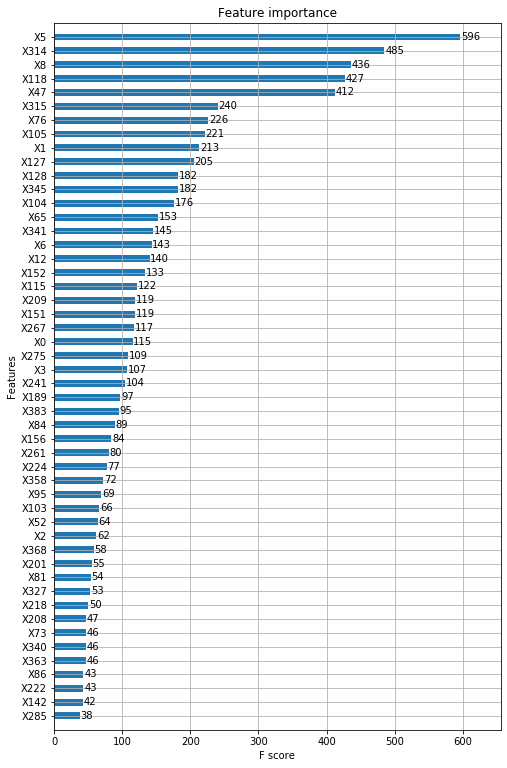

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [73]:
# PCA Implementation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train)

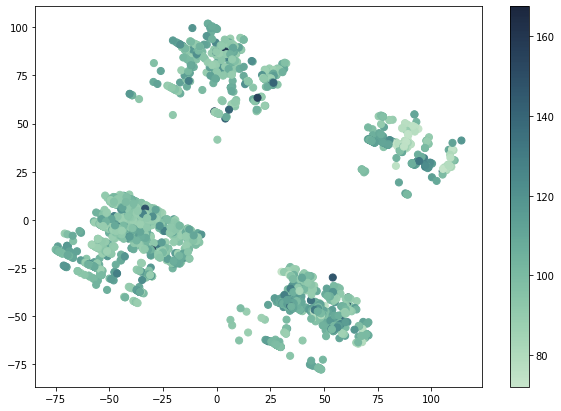

In [74]:
cmap = sns.cubehelix_palette(as_cmap=True,rot=-.4)
f, ax = plt.subplots(figsize=(10,7))
points = ax.scatter(pca_data[:,0], pca_data[:,1], c=y_train, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [75]:
# TSNE Implementation
model = TSNE(n_components=2,random_state=0,perplexity=30)

tsne_data = model.fit_transform(X_train)

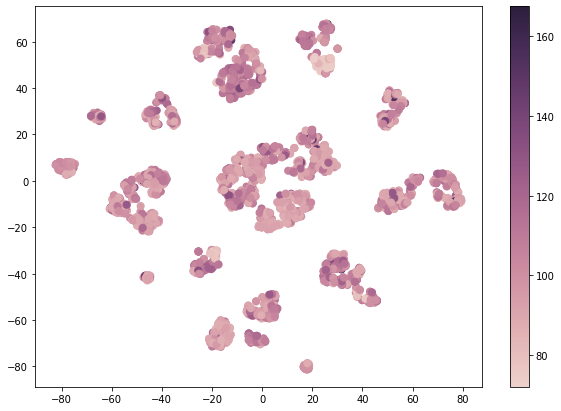

In [76]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(10,7))
points = ax.scatter(tsne_data[:,0], tsne_data[:,1], c=y_train, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [77]:
#KNN implementation
#biulding model

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

r2_score_knn = round(r2_score(y_test, y_pred),3)#taking r2score
accuracy = round(knn.score(X_train, y_train) *100,2)#taking accuracy

results = {'r2_score':r2_score_knn, 'accuracy':accuracy}
print (results)

{'r2_score': 0.267, 'accuracy': 56.69}


In [78]:
#SVR implementation
from sklearn.metrics import r2_score
clf = SVR()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

r2_score = round(r2_score(y_test, y_pred),3)#taking r2score
accuracy = round(clf.score(X_train, y_train) * 100, 2)

results = {'r2_score':r2_score, 'accuracy':accuracy}
print(results)

{'r2_score': -0.031, 'accuracy': -2.43}


In [79]:
#RFR implementation
from sklearn.metrics import r2_score
clf = RandomForestRegressor(n_estimators = 60 ,max_depth=5,oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

r2_score = round(r2_score(y_test, y_pred),3)#taking r2score
accuracy = round(clf.score(X_train, y_train) * 100, 2)

results = {'r2_score':r2_score, 'accuracy':accuracy}
print (results)

{'r2_score': 0.478, 'accuracy': 64.76}


In [80]:
#Linear Regression implementation
from sklearn.metrics import r2_score
clf = LinearRegression()
  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

r2_score = round(r2_score(y_test, y_pred),3)#taking r2score
accuracy = round(clf.score(X_train, y_train) * 100, 2)

results = {'r2_score':r2_score, 'accuracy':accuracy}
print (results)

{'r2_score': -1.6091700481024938e+19, 'accuracy': 63.06}
